In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/prediction.csv")

In [3]:
df

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,Relevant Text,gender,equality,women,education,girls,...,gap,rights,female,schooling,educational,Years with Highest Keyword Count,Years with Most Positive Sentiment,Parity_Indicator_Code,Country Code,Parity_Value
0,AFG,1971,29,0.309,wish congratulate election president general e...,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016990,0.117251,0.0,0.0,0.0,[1971],[2009],Primary,AFG,0.165
1,AFG,1971,29,0.309,wish congratulate election president general e...,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016990,0.117251,0.0,0.0,0.0,[1971],[2009],Secondary,AFG,0.146
2,AFG,1972,7,0.287,behalf afghan like extend warmest congratulati...,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041722,0.019195,0.0,0.0,0.0,[1971],[2009],Primary,AFG,0.168
3,AFG,1972,7,0.287,behalf afghan like extend warmest congratulati...,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041722,0.019195,0.0,0.0,0.0,[1971],[2009],Secondary,AFG,0.132
4,AFG,1972,7,0.287,behalf afghan like extend warmest congratulati...,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041722,0.019195,0.0,0.0,0.0,[1971],[2009],Tertiary,AFG,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16894,ZWE,2019,5,0.272,allow congratulate tijjani election president ...,0.000000,0.000000,0.023284,0.087638,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,[2022],[1999],Primary,ZWE,0.999
16895,ZWE,2019,5,0.272,allow congratulate tijjani election president ...,0.000000,0.000000,0.023284,0.087638,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,[2022],[1999],Tertiary,ZWE,0.961
16896,ZWE,2020,11,0.313,ambassador volkan president session united nat...,0.072177,0.024550,0.069271,0.000000,0.045721,...,0.000000,0.027747,0.0,0.0,0.0,[2022],[1999],Primary,ZWE,1.005
16897,ZWE,2020,11,0.313,ambassador volkan president session united nat...,0.072177,0.024550,0.069271,0.000000,0.045721,...,0.000000,0.027747,0.0,0.0,0.0,[2022],[1999],Tertiary,ZWE,0.962


In [4]:
df["Parity_Indicator_Code"].value_counts()

Primary      6660
Secondary    5390
Tertiary     4849
Name: Parity_Indicator_Code, dtype: int64

In [5]:
# tertiary data is quite sparse
df[df["Parity_Indicator_Code"] == "Tertiary"][["ISO-alpha3 Code", "Year"]].value_counts("Year").sort_values(ascending=True)

Year
2023      7
1970     13
1997     63
1981     67
1989     67
1973     68
1976     68
1988     68
1990     69
1991     70
1975     71
1978     71
1985     71
1974     72
2022     73
1982     73
1998     74
1992     74
1984     74
1983     74
1977     74
1986     75
1987     75
1979     76
1971     76
1972     78
1995     78
1980     79
1993     79
1996     80
1994     80
2000     98
2001     99
2007    103
1999    104
2005    107
2003    111
2008    111
2006    111
2021    112
2004    113
2002    114
2009    118
2010    120
2013    124
2019    125
2020    125
2014    126
2011    127
2012    130
2017    131
2018    132
2016    133
2015    138
dtype: int64

In [6]:
primary_df = df[df["Parity_Indicator_Code"] == "Primary"]

In [7]:
primary_df.reset_index(drop=True, inplace=True)
primary_df.value_counts("Year").sort_values(ascending=True)

Year
2022      4
1970     17
2021     66
1973     91
1971     92
1975     95
1972    100
1974    100
1976    106
1985    106
1980    107
1979    108
1990    110
1989    111
1997    111
1977    111
1982    111
1981    112
1987    112
1988    113
1983    114
1984    114
1978    114
1986    120
1996    124
1991    126
1992    130
1995    130
1998    131
2020    134
1993    134
1994    135
2000    145
2019    149
2003    151
2010    151
2001    153
2018    153
1999    154
2006    154
2013    154
2005    156
2009    157
2004    157
2002    158
2008    158
2014    159
2016    159
2017    159
2015    160
2007    161
2011    161
2012    162
dtype: int64

In [8]:
# drop columns based on no relevancy or potential future information -> at point of prediction, take 1990, the model shouldnt and cant know that 2017 was the highest sentiment score
primary_df = primary_df.drop(columns=["Relevant Text", "Years with Highest Keyword Count", "Years with Most Positive Sentiment", "Parity_Indicator_Code", "Country Code"])

In [9]:
# drop years 1970, 2021 and 2022 as only few data points are available
primary_df[~primary_df["Year"].isin([1970, 2021, 2022])]

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
0,AFG,1971,29,0.309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.015300,0.0,0.035599,0.016990,0.117251,0.0,0.0,0.0,0.165
1,AFG,1972,7,0.287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.018786,0.0,0.021855,0.041722,0.019195,0.0,0.0,0.0,0.168
2,AFG,1973,13,0.326,0.000000,0.016138,0.015178,0.000000,0.000000,0.016196,...,0.0,0.017851,0.0,0.041533,0.000000,0.054719,0.0,0.0,0.0,0.176
3,AFG,1974,10,0.321,0.000000,0.000000,0.000000,0.000000,0.000000,0.015001,...,0.0,0.000000,0.0,0.000000,0.000000,0.076023,0.0,0.0,0.0,0.175
4,AFG,1975,7,0.357,0.000000,0.038703,0.000000,0.000000,0.000000,0.019421,...,0.0,0.021406,0.0,0.000000,0.000000,0.043744,0.0,0.0,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,ZWE,2016,0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.983
6655,ZWE,2017,5,0.286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.030699,0.000000,0.0,0.0,0.0,0.992
6656,ZWE,2018,8,0.322,0.037104,0.025241,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.997
6657,ZWE,2019,5,0.272,0.000000,0.000000,0.023284,0.087638,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.999


In [10]:
countries = pd.DataFrame(data={"ISO-alpha3 Code": primary_df["ISO-alpha3 Code"].unique()})

In [11]:
df_base_year = pd.DataFrame(data={"Year": np.arange(1971, 2021)})

In [12]:
cross = pd.merge(countries, df_base_year, how="cross")
cross

,ISO-alpha3 Code,Year
0,AFG,1971
1,AFG,1972
2,AFG,1973
3,AFG,1974
4,AFG,1975
...,...,...
9545,ZWE,2016
9546,ZWE,2017
9547,ZWE,2018
9548,ZWE,2019


In [13]:
# add missing years for all countries
all_years = pd.merge(cross, primary_df, on=["Year", "ISO-alpha3 Code"], how="left")

In [14]:
# noticed that some years are missing -> checked by creating dataframe with all combinations of years and countries and left joining that to the original (primary_df) dataframe to check for na values
nas = all_years[all_years["Keyword Count"].isna()]["ISO-alpha3 Code"].value_counts()

In [15]:
na_list = list(nas[nas > 10].index)

In [16]:
len(na_list)

106

In [17]:
all_years[all_years["ISO-alpha3 Code"] == "DEU"]

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
2100,DEU,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,DEU,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,DEU,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,DEU,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2104,DEU,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,DEU,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,DEU,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2107,DEU,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,DEU,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109,DEU,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Sort the dataframe by 'ISO-alpha3 Code' and 'Year'
all_years = all_years.sort_values(by=['ISO-alpha3 Code', 'Year'])
all_years

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,parity,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value
0,AFG,1971,29.0,0.309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.015300,0.0,0.035599,0.016990,0.117251,0.0,0.0,0.0,0.165
1,AFG,1972,7.0,0.287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.018786,0.0,0.021855,0.041722,0.019195,0.0,0.0,0.0,0.168
2,AFG,1973,13.0,0.326,0.000000,0.016138,0.015178,0.000000,0.000000,0.016196,...,0.0,0.017851,0.0,0.041533,0.000000,0.054719,0.0,0.0,0.0,0.176
3,AFG,1974,10.0,0.321,0.000000,0.000000,0.000000,0.000000,0.000000,0.015001,...,0.0,0.000000,0.0,0.000000,0.000000,0.076023,0.0,0.0,0.0,0.175
4,AFG,1975,7.0,0.357,0.000000,0.038703,0.000000,0.000000,0.000000,0.019421,...,0.0,0.021406,0.0,0.000000,0.000000,0.043744,0.0,0.0,0.0,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.983
9546,ZWE,2017,5.0,0.286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.030699,0.000000,0.0,0.0,0.0,0.992
9547,ZWE,2018,8.0,0.322,0.037104,0.025241,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.997
9548,ZWE,2019,5.0,0.272,0.000000,0.000000,0.023284,0.087638,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.999


In [19]:
all_years['Parity_Change'] = all_years.groupby('ISO-alpha3 Code')['Parity_Value'].diff()
all_years.dropna(subset=['Parity_Change'], inplace=True)

In [20]:
all_years

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,...,balance,equity,discrimination,gap,rights,female,schooling,educational,Parity_Value,Parity_Change
1,AFG,1972,7.0,0.287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018786,0.0,0.021855,0.041722,0.019195,0.0,0.0,0.0,0.168,0.003
2,AFG,1973,13.0,0.326,0.000000,0.016138,0.015178,0.000000,0.000000,0.016196,...,0.017851,0.0,0.041533,0.000000,0.054719,0.0,0.0,0.0,0.176,0.008
3,AFG,1974,10.0,0.321,0.000000,0.000000,0.000000,0.000000,0.000000,0.015001,...,0.000000,0.0,0.000000,0.000000,0.076023,0.0,0.0,0.0,0.175,-0.001
4,AFG,1975,7.0,0.357,0.000000,0.038703,0.000000,0.000000,0.000000,0.019421,...,0.021406,0.0,0.000000,0.000000,0.043744,0.0,0.0,0.0,0.183,0.008
5,AFG,1976,18.0,0.326,0.000000,0.017128,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.066124,0.000000,0.087117,0.0,0.0,0.0,0.189,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.983,0.003
9546,ZWE,2017,5.0,0.286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.030699,0.000000,0.0,0.0,0.0,0.992,0.009
9547,ZWE,2018,8.0,0.322,0.037104,0.025241,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.997,0.005
9548,ZWE,2019,5.0,0.272,0.000000,0.000000,0.023284,0.087638,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.999,0.002


In [21]:
x = all_years.drop(columns=["Parity_Change", "Parity_Value"])
x

,ISO-alpha3 Code,Year,Keyword Count,Sentiment Score,gender,equality,women,education,girls,equal,access,parity,balance,equity,discrimination,gap,rights,female,schooling,educational
1,AFG,1972,7.0,0.287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016263,0.000000,0.018786,0.0,0.021855,0.041722,0.019195,0.0,0.0,0.0
2,AFG,1973,13.0,0.326,0.000000,0.016138,0.015178,0.000000,0.000000,0.016196,0.015453,0.000000,0.017851,0.0,0.041533,0.000000,0.054719,0.0,0.0,0.0
3,AFG,1974,10.0,0.321,0.000000,0.000000,0.000000,0.000000,0.000000,0.015001,0.014313,0.000000,0.000000,0.0,0.000000,0.000000,0.076023,0.0,0.0,0.0
4,AFG,1975,7.0,0.357,0.000000,0.038703,0.000000,0.000000,0.000000,0.019421,0.000000,0.000000,0.021406,0.0,0.000000,0.000000,0.043744,0.0,0.0,0.0
5,AFG,1976,18.0,0.326,0.000000,0.017128,0.000000,0.000000,0.000000,0.000000,0.032804,0.040002,0.000000,0.0,0.066124,0.000000,0.087117,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,ZWE,2016,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
9546,ZWE,2017,5.0,0.286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023933,0.000000,0.000000,0.0,0.000000,0.030699,0.000000,0.0,0.0,0.0
9547,ZWE,2018,8.0,0.322,0.037104,0.025241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
9548,ZWE,2019,5.0,0.272,0.000000,0.000000,0.023284,0.087638,0.000000,0.000000,0.023705,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [22]:
y_change = all_years["Parity_Change"]

In [23]:
y_val = all_years["Parity_Change"]

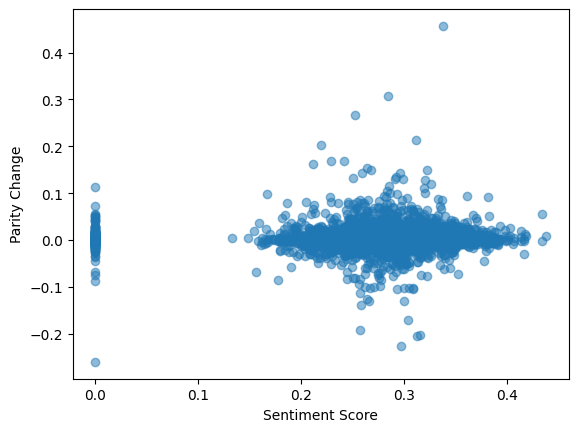

In [24]:
plt.scatter(x["Sentiment Score"], y_change, alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Parity Change")
plt.show()

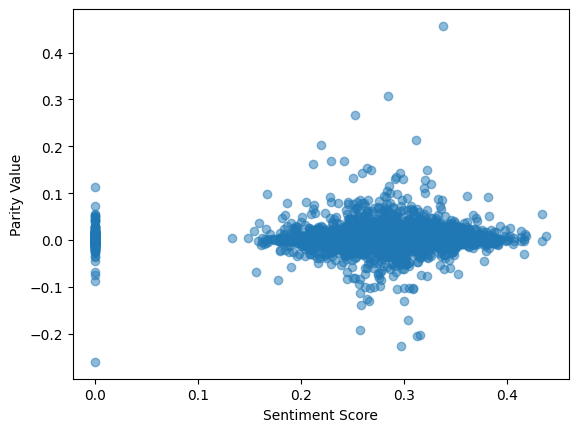

In [25]:
plt.scatter(x["Sentiment Score"], y_change, alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Parity Value")
plt.show()

In [26]:
x_test = all_years[all_years["Year"] >= 2015].drop(["Parity_Change", "Parity_Value"], axis=1)
x_train = all_years[all_years["Year"] < 2015].drop(["Parity_Change", "Parity_Value"], axis=1)


In [27]:
y_test_val = all_years[all_years["Year"] >= 2015]["Parity_Value"]
y_train_val = all_years[all_years["Year"] < 2015]["Parity_Value"]

y_test_change = all_years[all_years["Year"] >= 2015]["Parity_Change"]
y_train_change = all_years[all_years["Year"] < 2015]["Parity_Change"]

y_test_change = y_test_change.apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))
y_train_changecat = y_train_change.apply(lambda x: 2 if x > 0 else (1 if x == 0 else 0))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


# One Hot Encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_train = encoder.fit_transform(x_train[['ISO-alpha3 Code']]).toarray()
encoded_test = encoder.transform(x_test[['ISO-alpha3 Code']]).toarray()

# Convert encoded features to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))

# Drop original categorical column and concatenate encoded columns
x_train = x_train.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
x_test = x_test.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
x_train = pd.concat([x_train, encoded_train_df], axis=1)
x_test = pd.concat([x_test, encoded_test_df], axis=1)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train_changecat)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train_changecat)

# Predict using Logistic Regression
y_pred_log_reg = log_reg.predict(x_test)

# Predict using Naive Bayes
y_pred_nb = nb.predict(x_test)

# Evaluate performance
accuracy_log_reg = accuracy_score(y_test_change, y_pred_log_reg)
accuracy_nb = accuracy_score(y_test_change, y_pred_nb)

print(f"Accuracy for Logistic Regression: {accuracy_log_reg}")
print(f"Accuracy for Naive Bayes: {accuracy_nb}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_change, y_pred_log_reg))

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_change, y_pred_nb))

Accuracy for Logistic Regression: 0.5331010452961672
Accuracy for Naive Bayes: 0.21138211382113822

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.00      0.00      0.00        76
           2       0.53      1.00      0.70       459

    accuracy                           0.53       861
   macro avg       0.18      0.33      0.23       861
weighted avg       0.28      0.53      0.37       861


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.42      0.18      0.25       326
           1       0.09      0.74      0.17        76
           2       0.52      0.15      0.23       459

    accuracy                           0.21       861
   macro avg       0.34      0.35      0.22       861
weighted avg       0.44      0.21      0.23       861



/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [1000]
}

# Parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create Logistic Regression model
log_reg = LogisticRegression()

# Create Naive Bayes model
nb = GaussianNB()

# GridSearch for Logistic Regression
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', verbose=1)
grid_log_reg.fit(x_train, y_train_changecat)

# GridSearch for Naive Bayes
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_nb.fit(x_train, y_train_changecat)

# Best parameters and scores for Logistic Regression
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best score for Logistic Regression:", grid_log_reg.best_score_)

# Best parameters and scores for Naive Bayes
print("Best parameters for Naive Bayes:", grid_nb.best_params_)
print("Best score for Naive Bayes:", grid_nb.best_score_)

# Predict on test set using the best Logistic Regression model
y_pred_log_reg = grid_log_reg.best_estimator_.predict(x_test)

# Predict on test set using the best Naive Bayes model
y_pred_nb = grid_nb.best_estimator_.predict(x_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test_change, y_pred_log_reg)
print(f"Test Accuracy for Logistic Regression: {accuracy_log_reg}")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_change, y_pred_log_reg))

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test_change, y_pred_nb)
print(f"Test Accuracy for Naive Bayes: {accuracy_nb}")
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test_change, y_pred_nb))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: Line

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 0.001, 'max_iter': 1000, 'solver': 'newton-cg'}
Best score for Logistic Regression: 0.5729913058959675
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best score for Naive Bayes: 0.07199628102034558
Test Accuracy for Logistic Regression: 0.5331010452961672

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.00      0.00      0.00        76
           2       0.53      1.00      0.70       459

    accuracy                           0.53       861
   macro avg       0.18      0.33      0.23       861
weighted avg       0.28      0.53      0.37       861

Test Accuracy for Naive Bayes: 0.21138211382113822

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.42      0.18      0.25       3

/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meryjoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Train Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train_val)

# Train Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train_val)

# Train Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train_val)

RandomForestRegressor()

In [35]:
param_grid_linear = {
    # Not many hyperparameters to tune for Linear Regression
}

param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

linear_reg_change = LinearRegression()
tree_reg_change = DecisionTreeRegressor()
forest_reg_change = RandomForestRegressor()

In [33]:
# GridSearch for Linear Regression (no hyperparameters, but for consistency)
grid_search_linear = GridSearchCV(estimator=linear_reg_change, param_grid=param_grid_linear, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_linear.fit(x_train, y_train_change)

print("Best parameters for Linear Regression:", grid_search_linear.best_params_)
print("Best score for Linear Regression:", grid_search_linear.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Linear Regression: {}
Best score for Linear Regression: -6.588136208208506e+16


In [34]:
# GridSearch for Decision Tree Regressor
grid_search_tree = GridSearchCV(estimator=tree_reg_change, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_tree.fit(x_train, y_train_change)

print("\nBest parameters for Decision Tree Regressor:", grid_search_tree.best_params_)
print("Best score for Decision Tree Regressor:", grid_search_tree.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters for Decision Tree Regressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for Decision Tree Regressor: -0.0005160813551443482


In [36]:
# GridSearch for Random Forest Regressor
grid_search_forest = GridSearchCV(estimator=forest_reg_change, param_grid=param_grid_forest, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_forest.fit(x_train, y_train_change)

print("\nBest parameters for Random Forest Regressor:", grid_search_forest.best_params_)
print("Best score for Random Forest Regressor:", grid_search_forest.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Linear Regression
y_pred_linear = linear_reg.predict(x_test)

# Predict using Decision Tree Regressor
y_pred_tree = tree_reg.predict(x_test)

# Predict using Random Forest Regressor
y_pred_forest = forest_reg.predict(x_test)

# Calculate Mean Squared Error for each model
mse_linear = mean_squared_error(y_test_val, y_pred_linear)
mse_tree = mean_squared_error(y_test_val, y_pred_tree)
mse_forest = mean_squared_error(y_test_val, y_pred_forest)

print(f"Mean Squared Error for Linear Regression: {mse_linear}")
print(f"Mean Squared Error for Decision Tree Regressor: {mse_tree}")
print(f"Mean Squared Error for Random Forest Regressor: {mse_forest}")

# Calculate R^2 score for each model
r2_linear = r2_score(y_test_val, y_pred_linear)
r2_tree = r2_score(y_test_val, y_pred_tree)
r2_forest = r2_score(y_test_val, y_pred_forest)

print(f"R^2 Score for Linear Regression: {r2_linear}")
print(f"R^2 Score for Decision Tree Regressor: {r2_tree}")
print(f"R^2 Score for Random Forest Regressor: {r2_forest}")

Mean Squared Error for Linear Regression: 5.6632732294280744e+16
Mean Squared Error for Decision Tree Regressor: 0.0008039790940766548
Mean Squared Error for Random Forest Regressor: 0.0008516781399535438
R^2 Score for Linear Regression: -2.2648796508036526e+19
R^2 Score for Decision Tree Regressor: 0.6784693557810803
R^2 Score for Random Forest Regressor: 0.6593933560910166


In [32]:
# Train Linear Regression
linear_reg_change = LinearRegression()
linear_reg_change.fit(x_train, y_train_change)

# Train Decision Tree Regressor
tree_reg_change = DecisionTreeRegressor()
tree_reg_change.fit(x_train, y_train_change)

# Train Random Forest Regressor
forest_reg_change = RandomForestRegressor()
forest_reg_change.fit(x_train, y_train_change)

RandomForestRegressor()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Linear Regression
y_pred_linear = linear_reg_change.predict(x_test)

# Predict using Decision Tree Regressor
y_pred_tree = tree_reg_change.predict(x_test)

# Predict using Random Forest Regressor
y_pred_forest = forest_reg_change.predict(x_test)

# Calculate Mean Squared Error for each model
mse_linear = mean_squared_error(y_test_change, y_pred_linear)
mse_tree = mean_squared_error(y_test_change, y_pred_tree)
mse_forest = mean_squared_error(y_test_change, y_pred_forest)

print(f"Mean Squared Error for Linear Regression: {mse_linear}")
print(f"Mean Squared Error for Decision Tree Regressor: {mse_tree}")
print(f"Mean Squared Error for Random Forest Regressor: {mse_forest}")

# Calculate R^2 score for each model
r2_linear = r2_score(y_test_change, y_pred_linear)
r2_tree = r2_score(y_test_change, y_pred_tree)
r2_forest = r2_score(y_test_change, y_pred_forest)

print(f"R^2 Score for Linear Regression: {r2_linear}")
print(f"R^2 Score for Decision Tree Regressor: {r2_tree}")
print(f"R^2 Score for Random Forest Regressor: {r2_forest}")

Mean Squared Error for Linear Regression: 9853726178051990.0
Mean Squared Error for Decision Tree Regressor: 2.2177793983739837
Mean Squared Error for Random Forest Regressor: 2.2176383995758417
R^2 Score for Linear Regression: -1.1098174622817032e+16
R^2 Score for Decision Tree Regressor: -1.497867567384184
R^2 Score for Random Forest Regressor: -1.497708761542098


      Year  Keyword Count  Sentiment Score    gender  equality     women  \
0     1972            0.0           -1.000  0.000000  0.000000  0.000000   
1     1973            1.0            0.273  0.000000  0.000000  0.099189   
2     1974            0.0           -1.000  0.000000  0.000000  0.000000   
3     1975            0.0           -1.000  0.000000  0.000000  0.000000   
4     1976            2.0            0.177  0.000000  0.000000  0.000000   
...    ...            ...              ...       ...       ...       ...   
5884  2016            0.0           -1.000  0.000000  0.000000  0.000000   
5885  2017            0.0           -1.000  0.000000  0.000000  0.000000   
5886  2018            3.0            0.102  0.094684  0.099719  0.056700   
5887  2019            6.0            0.125  0.000000  0.000000  0.028102   
5888  2020            5.0            0.142  0.118654  0.000000  0.177635   

      education     girls     equal    access  ...  ISO-alpha3 Code_UZB  \
0      0.000

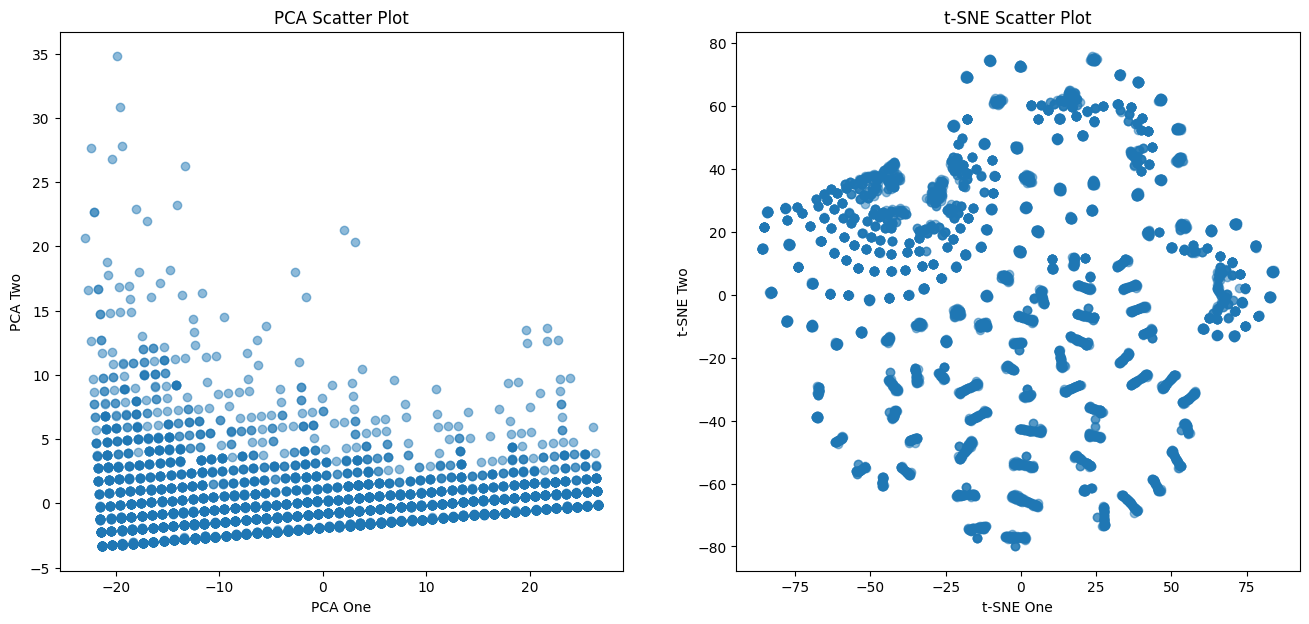

In [47]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data_init = all_years.drop(columns=["Parity_Change", "Parity_Value"])


encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(data_init[['ISO-alpha3 Code']]).toarray()

# Convert encoded features to DataFrame
encoded_2 = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))

# Drop original categorical column and concatenate encoded columns
data_init = data_init.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
data = pd.concat([data_init, encoded_2], axis=1)

print(data)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
data['pca-one'] = pca_result[:, 0]
data['pca-two'] = pca_result[:, 1]

# t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data)
data['tsne-one'] = tsne_result[:, 0]
data['tsne-two'] = tsne_result[:, 1]

plt.figure(figsize=(16, 7))

# Scatter plot for PCA
plt.subplot(1, 2, 1)
plt.scatter(data['pca-one'], data['pca-two'], alpha=0.5)
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('PCA Scatter Plot')

# Scatter plot for t-SNE
plt.subplot(1, 2, 2)
plt.scatter(data['tsne-one'], data['tsne-two'], alpha=0.5)
plt.xlabel('t-SNE One')
plt.ylabel('t-SNE Two')
plt.title('t-SNE Scatter Plot')

plt.show()

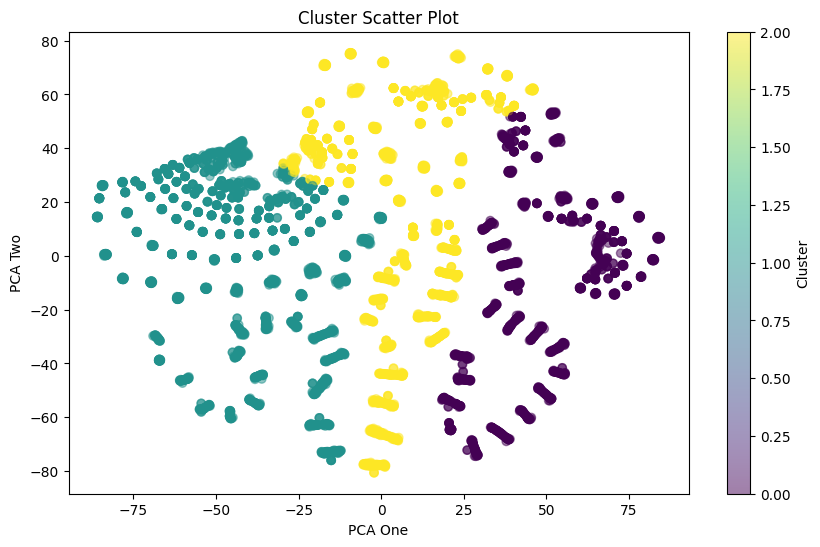

In [56]:
from sklearn.cluster import KMeans

# Drop the specified columns
data_init1 = all_years.drop(columns=["Parity_Change", "Parity_Value"])

encoder1 = OneHotEncoder(handle_unknown='ignore')
encoded1 = encoder.fit_transform(data_init1[['ISO-alpha3 Code']]).toarray()

# Convert encoded features to DataFrame
encoded_21 = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['ISO-alpha3 Code']))

# Drop original categorical column and concatenate encoded columns
data_init1 = data_init1.drop(columns=['ISO-alpha3 Code']).reset_index(drop=True)
data1 = pd.concat([data_init, encoded_2], axis=1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data1)
data1['pca-one'] = pca_result[:, 0]
data1['pca-two'] = pca_result[:, 1]

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data1)
data1['tsne-one'] = tsne_result[:, 0]
data1['tsne-two'] = tsne_result[:, 1]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(data1)

# Add the cluster labels to the dataframe
data1['Cluster'] = kmeans.labels_

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
plt.scatter(data1['tsne-one'], data1['tsne-two'], c=data['Cluster'], alpha=0.5)
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('Cluster Scatter Plot')
plt.colorbar(label='Cluster')
plt.show()